In [1]:
import numpy as np
from read_csv_data import *
from functions_tcga_prediction import *

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})

path_root_input = './input/'
path_root_output = './output/'
path_X_tpm_train = path_root_input+'coad_read_tpm_train_5fu.csv'
path_y_train = path_root_input+'coad_read_y_train_5fu.csv'
path_sample_qpcr = path_root_input+'All Samples qpcr.csv'
fig_save_path = '../paper_fig/'
number_of_sample = 13
best_C_neighbor_k = 9

In [2]:
# qpcr data
sample_qpcr_dct = np.array(read_csv_data(path_sample_qpcr, firstline=False))[:,1:number_of_sample+1].astype(np.float)

# training data
X_train = np.array(read_csv_data(path_X_tpm_train)).astype(np.float)
X_train = np.log(X_train+1)
y_train = np.array(read_csv_data(path_y_train)).T[0].astype(np.int)

y_test_ic50 = np.array([139.8,42.79,146.1,67.96,92.36,113.2,154.1,121.8,85.43,228.1] )
y_flag = [10,4,11,5,7,8,12,9,6,13]

k=-0.3995
b=5.6974
X_test = k*sample_qpcr_dct+b
X_test = X_test.T
y=np.r_[y_train,y_test_ic50]
y_map=np.r_[y_train*3,y_flag]
y_flag = np.array(y_flag)*2

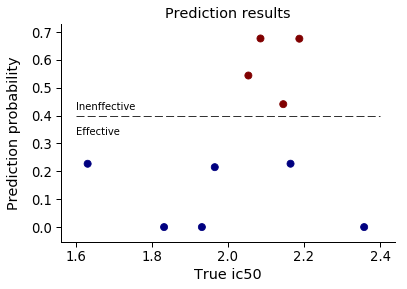

In [3]:
# knn prediction
y_test,y_pred_proba=Classification_By_Knn(X_train, y_train, X_test, best_C_neighbor_k)
plt.scatter(np.log10(y_test_ic50) ,y_pred_proba[:,1],c=y_pred_proba[:,1]>0.4,s=50,cmap='jet')
xx=np.linspace(1.6,2.4,40)
yy=0.4*np.ones(xx.size)
line,=plt.plot(xx,yy,linewidth=0.8,color='black',linestyle = '-')
line.set_dashes((10,4))
sns.despine()
plt.xlabel('True ic50')
plt.ylabel('Prediction probability',labelpad=10)
plt.title('Prediction results')
plt.text(1.6, 0.42, 'Inenffective')
plt.text(1.6, 0.33, 'Effective')
plt.show()

sum(pca.explained_variance_ratio_) 0.5727399036058434
(90, 2)
sum(pca.explained_variance_ratio_) 0.5727399036058434
(10, 2)


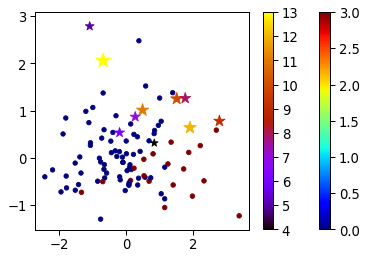

0

In [4]:
## Probability Estimates with go.Contour
C_neighbor_k = 30
X_pca_1,X_pca_2 = my_pca_RNA_2(X_train,X_test,y,y_map)
KNN_prob_estimate_plot_3(X_pca_1,y_train,X_pca_2,y_flag,y_test_ic50,C_neighbor_k,100,save_path=fig_save_path+'decision boundary')

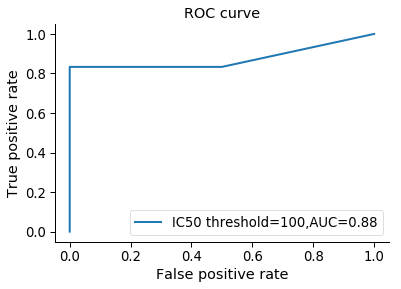

In [5]:
# roc auc
bounds=100
y_test_true = np.array(y_test_ic50)>bounds
auc_score = metrics.roc_auc_score(y_test_true, y_pred_proba[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test_true, y_pred_proba[:,1])
plt.plot(fpr,tpr,label='IC50 threshold=%d,AUC=%0.2f'%(bounds,auc_score))
plt.legend()
sns.despine()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.savefig(fig_save_path+'ROC curve SAMPLE.png',dpi=600)
plt.savefig(fig_save_path+'ROC curve SAMPLE.eps',format='eps')
plt.show()